# Telecom Churn Analysis

# Dataset Information
 This Data Set Consist of the Telecom Customer Data of Company who have been Churned Out with Current Customer of Company.

# Objective of Analysis
 Analysis of the data to understand the probable reason of Churn and understand the Customers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading Data
df = pd.read_csv("ChurnData.csv")

In [3]:
#Top Five Entries
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Understanding the Attributes

In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
#Checking Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#Descriptive Analysis
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

# Observations
1. SeniorCitizen is actually a Categorical Data as we can see there are two value only 0(Young) and 1(SeniorCitizen) hence the describe method is showing wrong information to us.

2. TotalCharges are in Object data type hence need to convert the data to integer type.

3. Average Tenure of Customer is 32 Months and  75% Customers have Tenure less than 55 Months. 

4. Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

In [9]:
index =  df["Churn"].value_counts().index
value = df["Churn"].value_counts().values

[Text(0, 0, '5174'), Text(0, 0, '1869')]

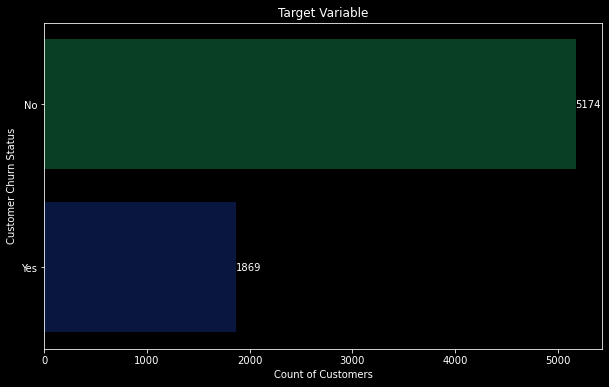

In [10]:
plt.style.use("dark_background")
plt.figure(figsize=(10,6))
plt.title("Target Variable")
ax=sns.barplot(x=value, y=index,palette=sns.color_palette("ocean") )
plt.xlabel("Count of Customers")
plt.ylabel("Customer Churn Status")
ax.bar_label(ax.containers[0])

In [11]:
#Checking data : Imbalanced or balanced 
100*df["Churn"].value_counts(normalize=True)

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

# Observation
 As the ratio of NO to YES is 73.46:26.53 that means the data is imbalanced.
# IMBALANCED DATA: The data set in which one class of have higher entries than other that dataset is considered as Imbalanced data

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'customerID'),
  Text(1, 0, 'gender'),
  Text(2, 0, 'SeniorCitizen'),
  Text(3, 0, 'Partner'),
  Text(4, 0, 'Dependents'),
  Text(5, 0, 'tenure'),
  Text(6, 0, 'PhoneService'),
  Text(7, 0, 'MultipleLines'),
  Text(8, 0, 'InternetService'),
  Text(9, 0, 'OnlineSecurity'),
  Text(10, 0, 'OnlineBackup'),
  Text(11, 0, 'DeviceProtection'),
  Text(12, 0, 'TechSupport'),
  Text(13, 0, 'StreamingTV'),
  Text(14, 0, 'StreamingMovies'),
  Text(15, 0, 'Contract'),
  Text(16, 0, 'PaperlessBilling'),
  Text(17, 0, 'PaymentMethod'),
  Text(18, 0, 'MonthlyCharges'),
  Text(19, 0, 'TotalCharges'),
  Text(20, 0, 'Churn')])

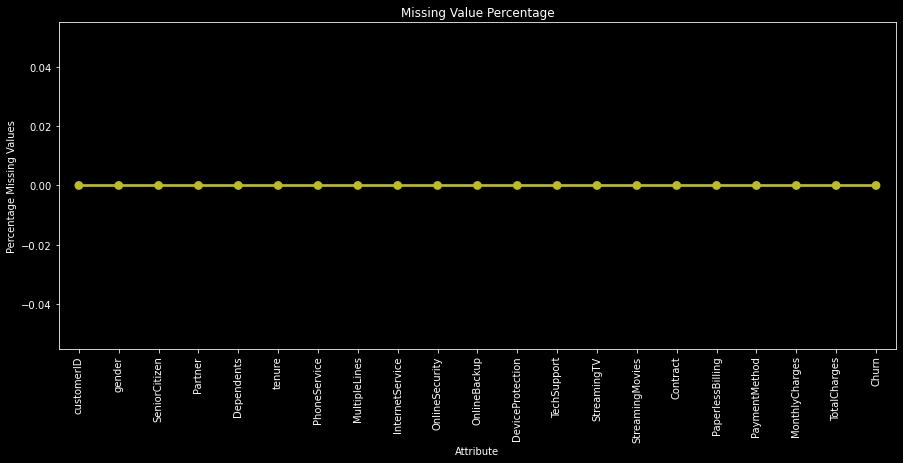

In [13]:
missing_percentage = (100*df.isnull().sum()/df.shape[0]).reset_index().rename(columns ={"index":"Attribute", 0:"Percentage Missing Values"})
plt.figure(figsize=(15,6))
plt.title("Missing Value Percentage")
sns.pointplot(x = "Attribute", y = "Percentage Missing Values", data = missing_percentage,linestyles='-',color='tab:olive')
plt.xticks(rotation = 90)

# Observation
We dont have any missing values present in the data.

# Data Cleaning

In [14]:
df_new = df.copy()

As per our previous Observation we Know that Total Charges should be in Numerical Data Type(float).

In [15]:
df_new["TotalCharges"] = pd.to_numeric(df_new["TotalCharges"], errors = 'coerce')

In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
df_new.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Observation 
Now we can see that TotalCharges have null values but before data conversion this values were not visible at first instance.

In [18]:
df_new[df_new["TotalCharges"].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


# Observation
As the missing values are comparitively very less than the available data, Hence we can drop them from the dataframe and can do further processing.

In [19]:
df_new.dropna(inplace = True)

In [20]:
df_new.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
#Removing unwanted Attribute
df_new.drop("customerID",axis=1, inplace=True)

In [22]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
df_new['tenure_group'] = pd.cut(df_new.tenure, range(1, 80, 12), right=False, labels=labels)

In [23]:
df_new.drop('tenure', axis =1, inplace = True)

# Univariate Analysis

In [24]:
df_categorical = df_new.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])

In [25]:
df_categorical.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_group'],
      dtype='object')

# Gender Analysis

In [26]:
#Count Plot Funtion
def count(attribute, color):
    plt.style.use("dark_background")
    plt.figure(figsize=(10,6))
    ax = sns.countplot(x=attribute, data = df_new , hue= 'Churn' , palette=sns.color_palette(color))
    plt.title("Churning with respect to" + " " +attribute, fontsize = 18)
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])

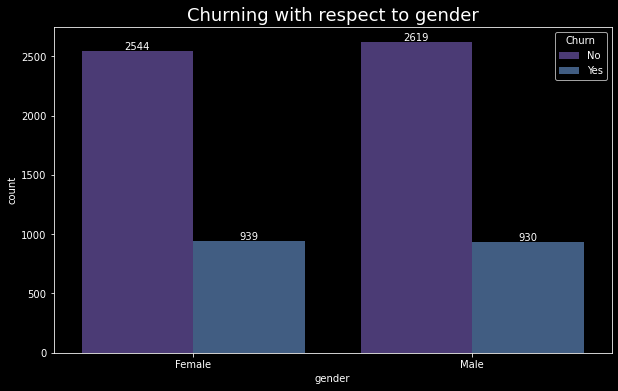

In [27]:
count("gender", "viridis")

# Observation
Male and Female are churning at approximately same Rate(26%).

# Senior Citizen

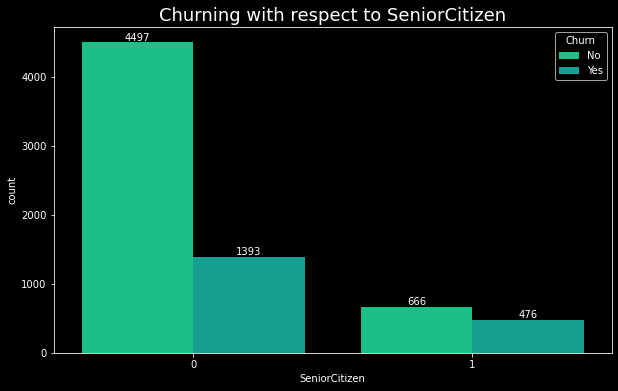

In [27]:
count("SeniorCitizen", "winter_r")

In [28]:
def Groupby(Attribute):
    return df_new.groupby([Attribute, "Churn"]).size().reset_index().rename(columns={0:"Count"})
senior = Groupby("SeniorCitizen")

([<matplotlib.patches.Wedge at 0x1f97c34e730>,
 [Text(-0.28421379856096773, 1.0626488209693483, 'No'),
  Text(0.28421379856096735, -1.0626488209693483, 'Yes')],
 [Text(-0.15502570830598236, 0.5796266296196444, '58%'),
  Text(0.15502570830598217, -0.5796266296196445, '42%')])

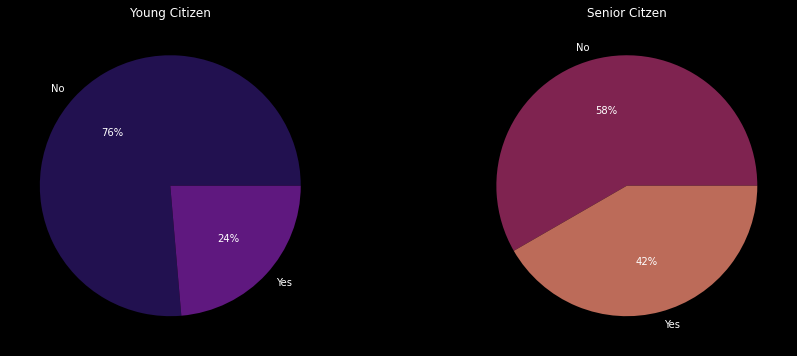

In [29]:
#Senior Citizen Churnnig Out Rate
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Young Citizen")
plt.pie(senior[senior['SeniorCitizen']==0]["Count"], 
        labels=senior[senior['SeniorCitizen']!=0]["Churn"], autopct="%1.f%%", colors=sns.color_palette("magma"))
plt.subplot(1,2,2)
plt.title("Senior Citzen")
plt.pie(senior[senior['SeniorCitizen']!=0]["Count"], 
        labels=senior[senior['SeniorCitizen']==0]["Churn"], autopct="%1.f%%", colors = sns.color_palette('twilight_shifted_r'))

# Observation
Senior Citizen is churning out at higher rate(42%) compared to Young Citizens(24%).

# Partner Attribute

In [30]:
partner = Groupby("Partner")
partner

,Partner,Churn,Count
0,No,No,2439
1,No,Yes,1200
2,Yes,No,2724
3,Yes,Yes,669


In [31]:
partner["Partner"].unique()

array(['No', 'Yes'], dtype=object)

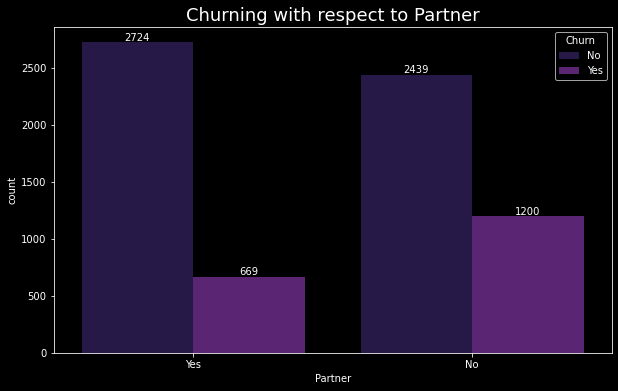

In [32]:
count("Partner", "magma")

([<matplotlib.patches.Wedge at 0x1f97c6fc8e0>,
 [Text(-0.5606565778493959, 0.9463953728300897, 'No'),
  Text(0.5606565778493954, -0.94639537283009, 'Yes')],
 [Text(-0.30581267882694324, 0.5162156579073216, '67%'),
  Text(0.3058126788269429, -0.5162156579073217, '33%')])

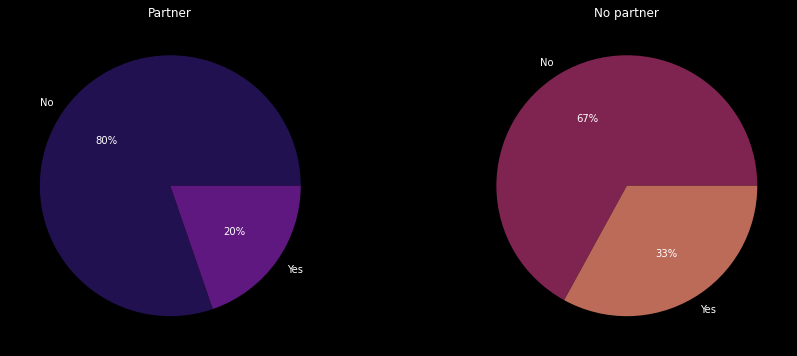

In [33]:

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Partner")
plt.pie(partner[partner["Partner"]=="Yes"]["Count"], 
        labels=partner[partner["Partner"]=="Yes"]["Churn"], autopct="%1.f%%", colors=sns.color_palette("magma"))
plt.subplot(1,2,2)
plt.title("No partner")
plt.pie(partner[partner["Partner"]!="Yes"]["Count"], 
        labels=partner[partner["Partner"]!="Yes"]["Churn"], autopct="%1.f%%", colors = sns.color_palette('twilight_shifted_r'))

# Obserbation
Customer who have Partner are less likely to churn as Compare to Customers having partner in company.

# Dependent

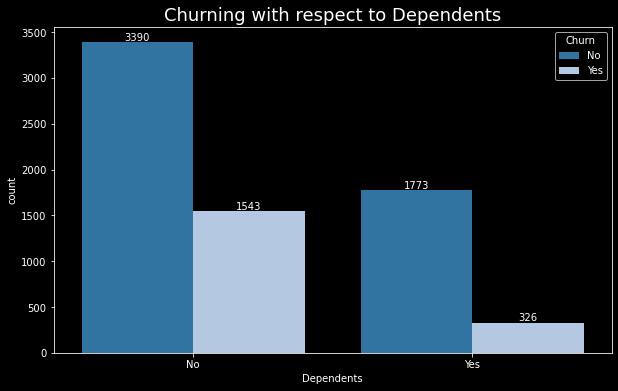

In [34]:
count('Dependents', "tab20")

([<matplotlib.patches.Wedge at 0x1f97c7ff640>,
 [Text(-0.6102896849393339, 0.9151756664469662, 'No'),
  Text(0.6102896849393338, -0.9151756664469662, 'Yes')],
 [Text(-0.33288528269418205, 0.49918672715289064, '69%'),
  Text(0.332885282694182, -0.49918672715289064, '31%')])

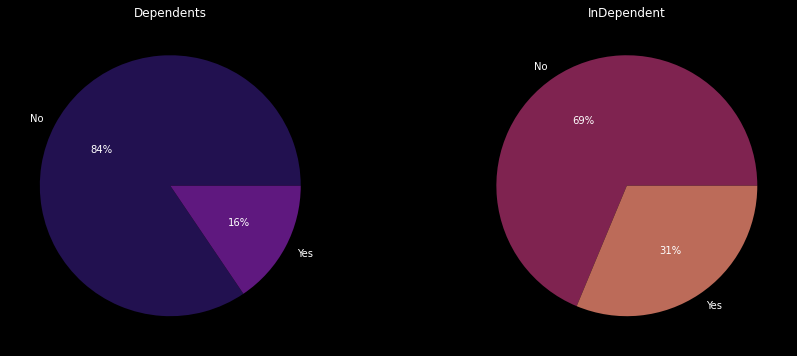

In [35]:
depen = Groupby("Dependents")
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Dependents")
plt.pie(depen[depen["Dependents"]=="Yes"]["Count"], 
        labels=depen[depen["Dependents"]=="Yes"]["Churn"], autopct="%1.f%%", colors=sns.color_palette("magma"))
plt.subplot(1,2,2)
plt.title("InDependent")
plt.pie(depen[depen["Dependents"]!="Yes"]["Count"], 
        labels=depen[depen["Dependents"]!="Yes"]["Churn"], autopct="%1.f%%", colors = sns.color_palette('twilight_shifted_r'))

# Observation 
Independent Customer  are Likely to churn more and Company have major customer from the Independent Customer Section only

# PhoneService

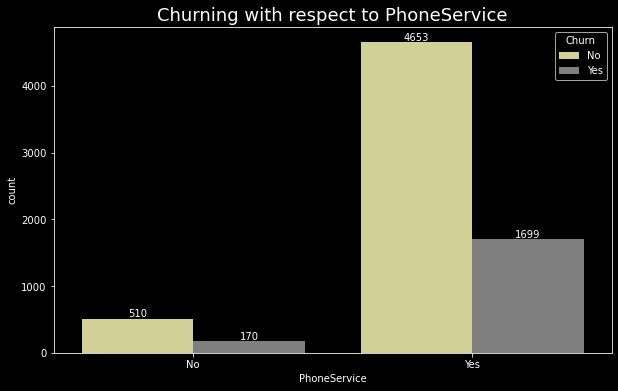

In [36]:
count("PhoneService", "tab20_r")

([<matplotlib.patches.Wedge at 0x1f97c70b790>,
 [Text(-0.7778174593052023, 0.7778174593052024, 'No'),
  Text(0.7778174593052022, -0.7778174593052025, 'Yes')],
 [Text(-0.42426406871192845, 0.4242640687119285, '75%'),
  Text(0.4242640687119284, -0.4242640687119286, '25%')])

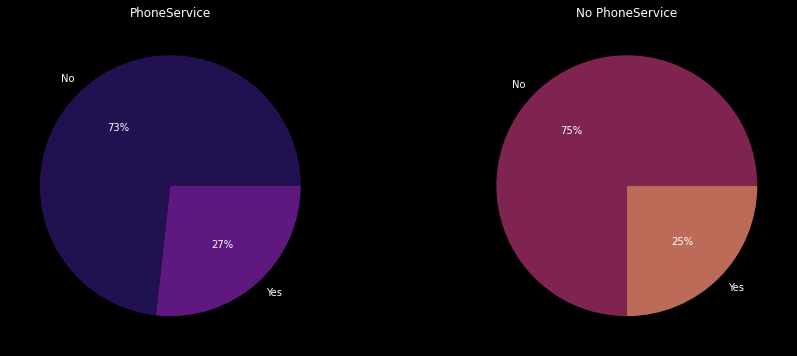

In [37]:
depen = Groupby("PhoneService")
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("PhoneService")
plt.pie(depen[depen["PhoneService"]=="Yes"]["Count"], 
        labels=depen[depen["PhoneService"]=="Yes"]["Churn"], autopct="%1.f%%", colors=sns.color_palette("magma"))
plt.subplot(1,2,2)
plt.title("No PhoneService")
plt.pie(depen[depen["PhoneService"]!="Yes"]["Count"], 
        labels=depen[depen["PhoneService"]!="Yes"]["Churn"], autopct="%1.f%%", colors = sns.color_palette('twilight_shifted_r'))

# Observation:
1. Company have major Customer who have Phone Service.
2. This customer are churning at 27%.

# Multiple Lines

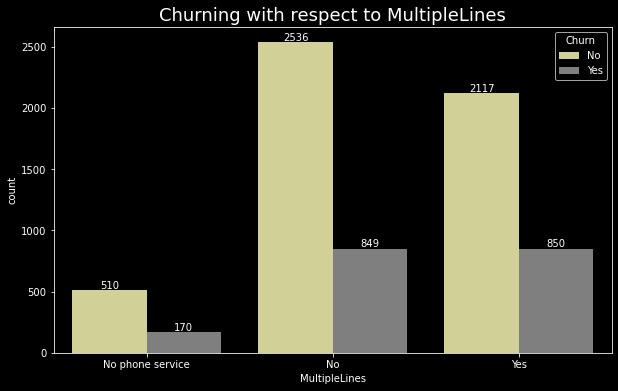

In [38]:
count('MultipleLines', "tab20_r")

([<matplotlib.patches.Wedge at 0x1f97c73f880>,
 [Text(-0.7758297315003799, 0.7798001203642176, 'No'),
  Text(0.7758297315003799, -0.7798001203642179, 'Yes')],
 [Text(-0.42317985354566173, 0.4253455201986642, '75%'),
  Text(0.42317985354566173, -0.42534552019866423, '25%')])

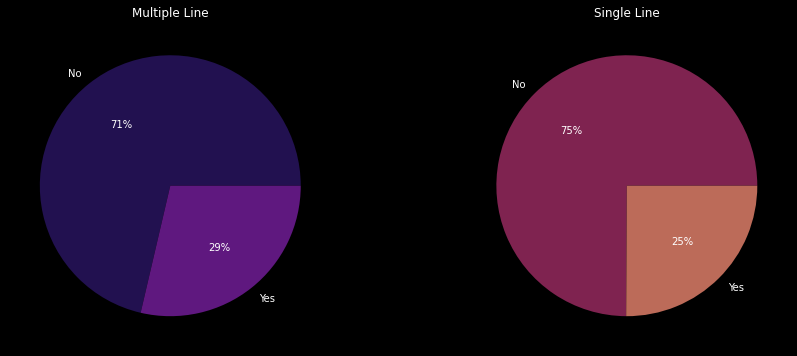

In [39]:
depen = Groupby( 'MultipleLines')
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Multiple Line")
plt.pie(depen[depen[ 'MultipleLines']=="Yes"]["Count"], 
        labels=depen[depen[ 'MultipleLines']=="Yes"]["Churn"], autopct="%1.f%%", colors=sns.color_palette("magma"))
plt.subplot(1,2,2)
plt.title("Single Line")
plt.pie(depen[depen[ 'MultipleLines']=="No"]["Count"], 
        labels=depen[depen['MultipleLines']=="No"]["Churn"], autopct="%1.f%%", colors = sns.color_palette('twilight_shifted_r'))

# Observation
1. Both customers have similare Churning rate.

# Internet Service

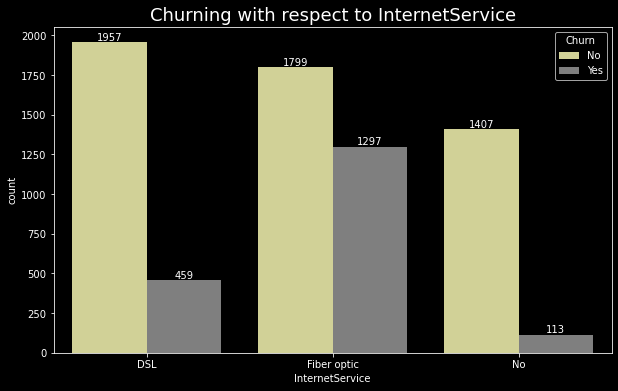

In [40]:
count('InternetService', "tab20_r")


In [41]:
depen = Groupby( 'InternetService')
depen[depen['InternetService']=="No"]["Count"]

4    1407
5     113
Name: Count, dtype: int64

([<matplotlib.patches.Wedge at 0x1f97dd503d0>,
 [Text(-1.0701353493396843, 0.25457873849485574, 'No'),
  Text(1.0701353255042978, -0.25457883868815706, 'Yes')],
 [Text(-0.5837101905489186, 0.1388611300881031, '93%'),
  Text(0.5837101775477987, -0.13886118473899475, '7%')])

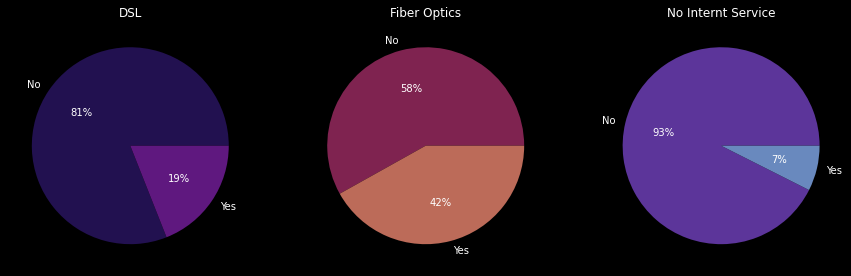

In [42]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.title('DSL')
plt.pie( depen[depen[ 'InternetService']=="DSL"]["Count"], 
        labels=depen[depen[ 'InternetService']=="DSL"]["Churn"], autopct="%1.f%%", colors=sns.color_palette("magma"))
plt.subplot(1,3,2)
plt.title("Fiber Optics")
plt.pie(depen[depen[ 'InternetService']=="Fiber optic"]["Count"], 
        labels=depen[depen['InternetService']=="Fiber optic"]["Churn"], autopct="%1.f%%", colors = sns.color_palette('twilight_shifted_r'))

plt.subplot(1,3,3)
plt.title("No Internt Service")
plt.pie(depen[depen[ 'InternetService']=="No"]["Count"], 
        labels=depen[depen['InternetService']=="No"]["Churn"], autopct="%1.f%%", colors = sns.color_palette('twilight_shifted'))

# Observation 
Customer having Fiber Optics Service are Churnning with rapid rate and number of churned cutsomers are also more.

# Online Security

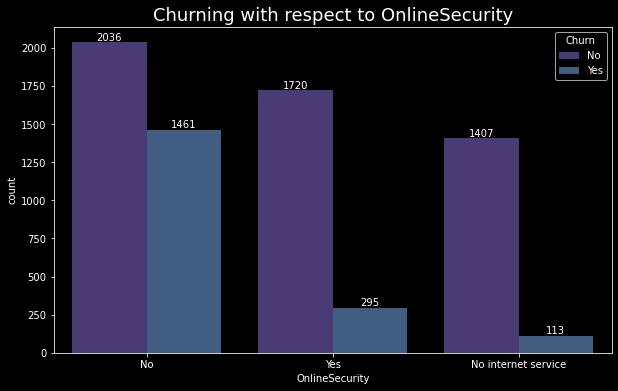

In [43]:
count('OnlineSecurity', 'viridis')

([<matplotlib.patches.Wedge at 0x1f97dfc9b80>,
 [Text(-1.0701353493396843, 0.25457873849485574, 'No'),
  Text(1.0701353255042978, -0.25457883868815706, 'Yes')],
 [Text(-0.5837101905489186, 0.1388611300881031, '93%'),
  Text(0.5837101775477987, -0.13886118473899475, '7%')])

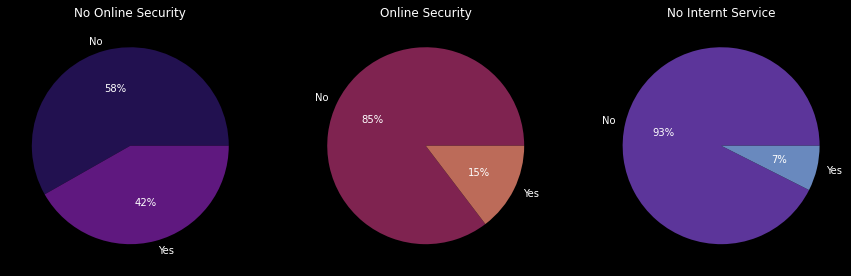

In [44]:
depen = Groupby('OnlineSecurity')
#Senior Citizen Churnnig Out Rate
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.title('No Online Security')
plt.pie( depen[depen[ 'OnlineSecurity']=="No"]["Count"], 
        labels=depen[depen['OnlineSecurity']=="No"]["Churn"], autopct="%1.f%%", colors=sns.color_palette("magma"))
plt.subplot(1,3,2)
plt.title('Online Security')
plt.pie(depen[depen['OnlineSecurity']=="Yes"]["Count"], 
        labels=depen[depen['OnlineSecurity']=="Yes"]["Churn"], autopct="%1.f%%", colors = sns.color_palette('twilight_shifted_r'))

plt.subplot(1,3,3)
plt.title("No Internt Service")
plt.pie(depen[depen['OnlineSecurity']=="No internet service"]["Count"], 
        labels=depen[depen['OnlineSecurity']=="No internet service"]["Churn"], autopct="%1.f%%", colors = sns.color_palette('twilight_shifted'))

# Observation 
1. Customer with No security are churning at rate of 42 %. This customers impact most to company.

# Online Backup

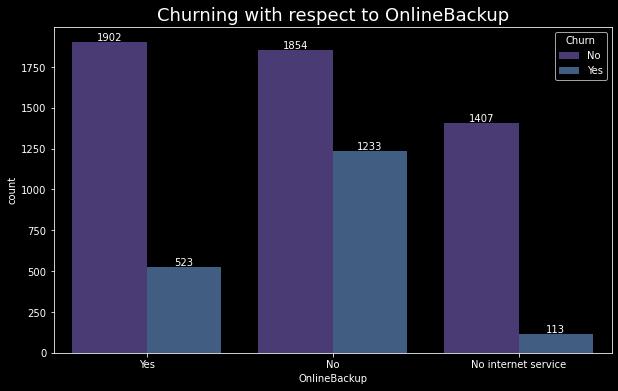

In [45]:
count('OnlineBackup', 'viridis')

([<matplotlib.patches.Wedge at 0x1f97e0da8b0>,
 [Text(-1.0701353493396843, 0.25457873849485574, 'No'),
  Text(1.0701353255042978, -0.25457883868815706, 'Yes')],
 [Text(-0.5837101905489186, 0.1388611300881031, '93%'),
  Text(0.5837101775477987, -0.13886118473899475, '7%')])

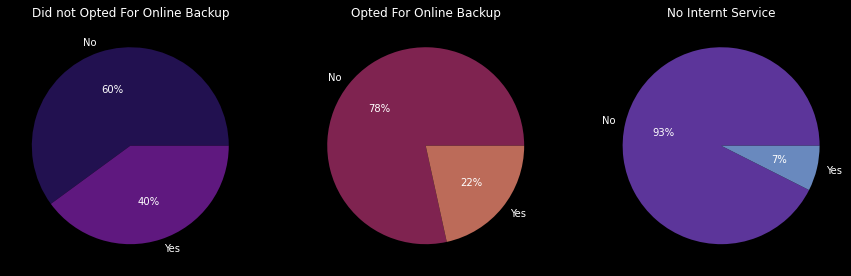

In [46]:
depen = Groupby('OnlineBackup')

plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.title('Did not Opted For Online Backup')
plt.pie( depen[depen[ 'OnlineBackup']=="No"]["Count"], 
        labels=depen[depen['OnlineBackup']=="No"]["Churn"], autopct="%1.f%%", colors=sns.color_palette("magma"))
plt.subplot(1,3,2)
plt.title("Opted For Online Backup")
plt.pie(depen[depen['OnlineBackup']=="Yes"]["Count"], 
        labels=depen[depen['OnlineBackup']=="Yes"]["Churn"], autopct="%1.f%%", colors = sns.color_palette('twilight_shifted_r'))

plt.subplot(1,3,3)
plt.title("No Internt Service")
plt.pie(depen[depen['OnlineBackup']=="No internet service"]["Count"], 
        labels=depen[depen['OnlineBackup']=="No internet service"]["Churn"], autopct="%1.f%%", colors = sns.color_palette('twilight_shifted'))

# Observation
Customer who are not opting for Onile backup are churning at 40% rate , need to minimize this churn rate with utmost priority.

# Device Protection

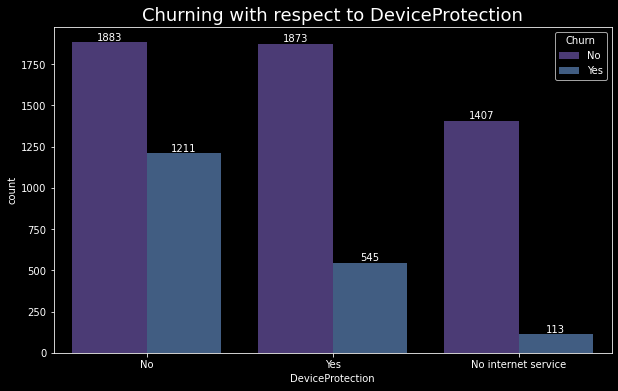

In [47]:
count('DeviceProtection', 'viridis')

([<matplotlib.patches.Wedge at 0x1f97e266610>,
 [Text(-1.0701353493396843, 0.25457873849485574, 'No'),
  Text(1.0701353255042978, -0.25457883868815706, 'Yes')],
 [Text(-0.5837101905489186, 0.1388611300881031, '93%'),
  Text(0.5837101775477987, -0.13886118473899475, '7%')])

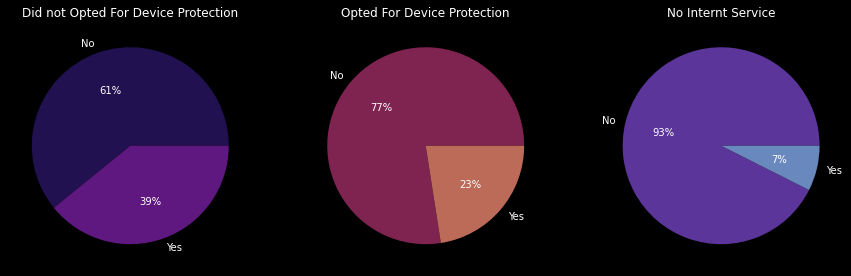

In [48]:
depen = Groupby('DeviceProtection')

plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.title('Did not Opted For Device Protection')
plt.pie( depen[depen[ 'DeviceProtection']=="No"]["Count"], 
        labels=depen[depen['DeviceProtection']=="No"]["Churn"], autopct="%1.f%%", colors=sns.color_palette("magma"))
plt.subplot(1,3,2)
plt.title("Opted For Device Protection")
plt.pie(depen[depen['DeviceProtection']=="Yes"]["Count"], 
        labels=depen[depen['DeviceProtection']=="Yes"]["Churn"], autopct="%1.f%%", colors = sns.color_palette('twilight_shifted_r'))

plt.subplot(1,3,3)
plt.title("No Internt Service")
plt.pie(depen[depen['DeviceProtection']=="No internet service"]["Count"], 
        labels=depen[depen['DeviceProtection']=="No internet service"]["Churn"], autopct="%1.f%%", colors = sns.color_palette('twilight_shifted'))

# Observation :
Customer who dont have device protection service are churing at rate of 39%.

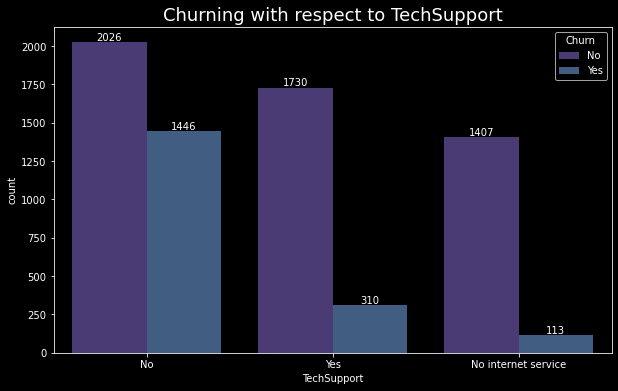

In [49]:
count('TechSupport', 'viridis')

# Observation 
Customers who don't have Tech Support are more likely to churn

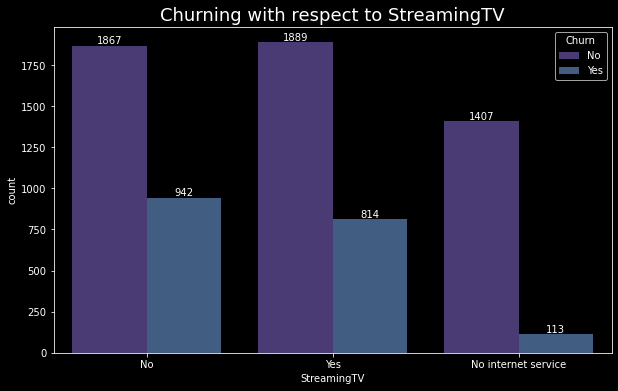

In [50]:
count('StreamingTV', 'viridis')

([<matplotlib.patches.Wedge at 0x1f97e290af0>,
 [Text(-1.0701353493396843, 0.25457873849485574, 'No'),
  Text(1.0701353255042978, -0.25457883868815706, 'Yes')],
 [Text(-0.5837101905489186, 0.1388611300881031, '93%'),
  Text(0.5837101775477987, -0.13886118473899475, '7%')])

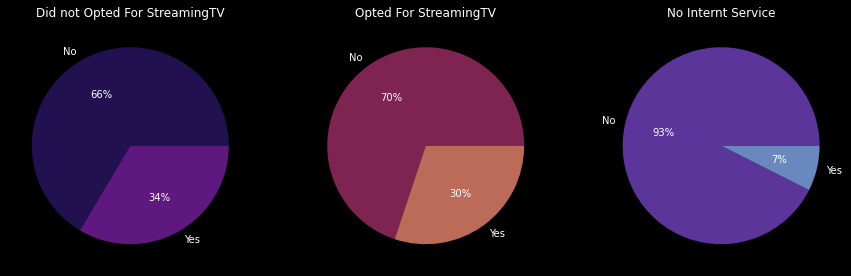

In [51]:

depen = Groupby('StreamingTV')

plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.title('Did not Opted For StreamingTV')
plt.pie( depen[depen[ 'StreamingTV']=="No"]["Count"], 
        labels=depen[depen['StreamingTV']=="No"]["Churn"], autopct="%1.f%%", colors=sns.color_palette("magma"))
plt.subplot(1,3,2)
plt.title("Opted For StreamingTV")
plt.pie(depen[depen['StreamingTV']=="Yes"]["Count"], 
        labels=depen[depen['StreamingTV']=="Yes"]["Churn"], autopct="%1.f%%", colors = sns.color_palette('twilight_shifted_r'))

plt.subplot(1,3,3)
plt.title("No Internt Service")
plt.pie(depen[depen['StreamingTV']=="No internet service"]["Count"], 
        labels=depen[depen['StreamingTV']=="No internet service"]["Churn"], autopct="%1.f%%", colors = sns.color_palette('twilight_shifted'))

# Observation
Customer who opted for this service and who didnot opted both are churnning at similar rate.

# Contract

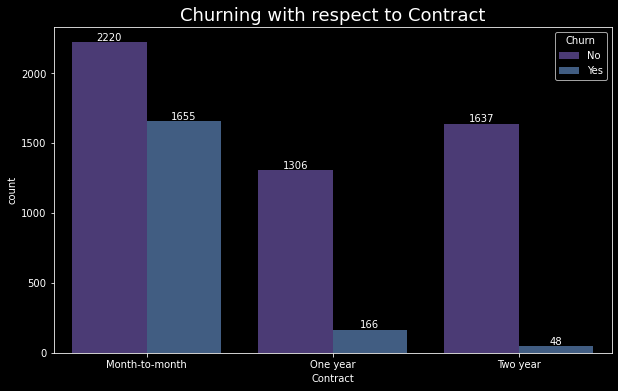

In [52]:
count('Contract', 'viridis')

# Observation 
As the Contract period is increasing Churn Rate is decreasing.

# Paperless Billing

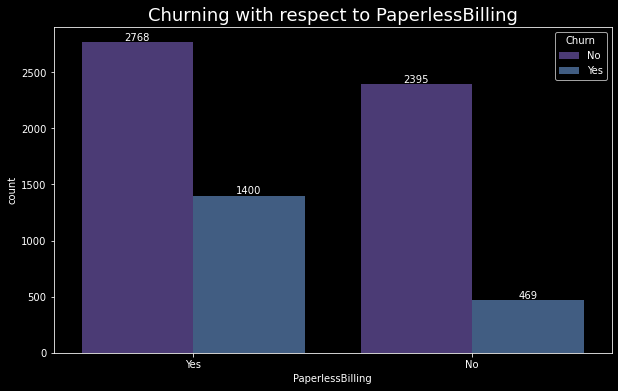

In [53]:
count('PaperlessBilling', 'viridis')

# Observation 
Customer who do paperless billing are churning at rate of 33%(approx)

# Tenure

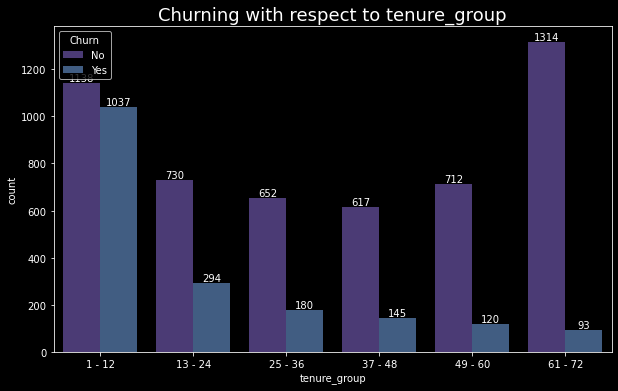

In [54]:
count('tenure_group', 'viridis')

# Observation
1. Customers with tenure greater than 5 year are less likely to churn.
2. Customer with tenure less than 1 year are churning at highest rate( 50 % approximately)
3. All other tenure customers are churning at approximately similar rate.

In [55]:
df_new['Churn'] = np.where(df_new.Churn == 'Yes',1,0)

In [56]:
df_dummy = pd.get_dummies(df_new)
df_dummy.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


<AxesSubplot:>

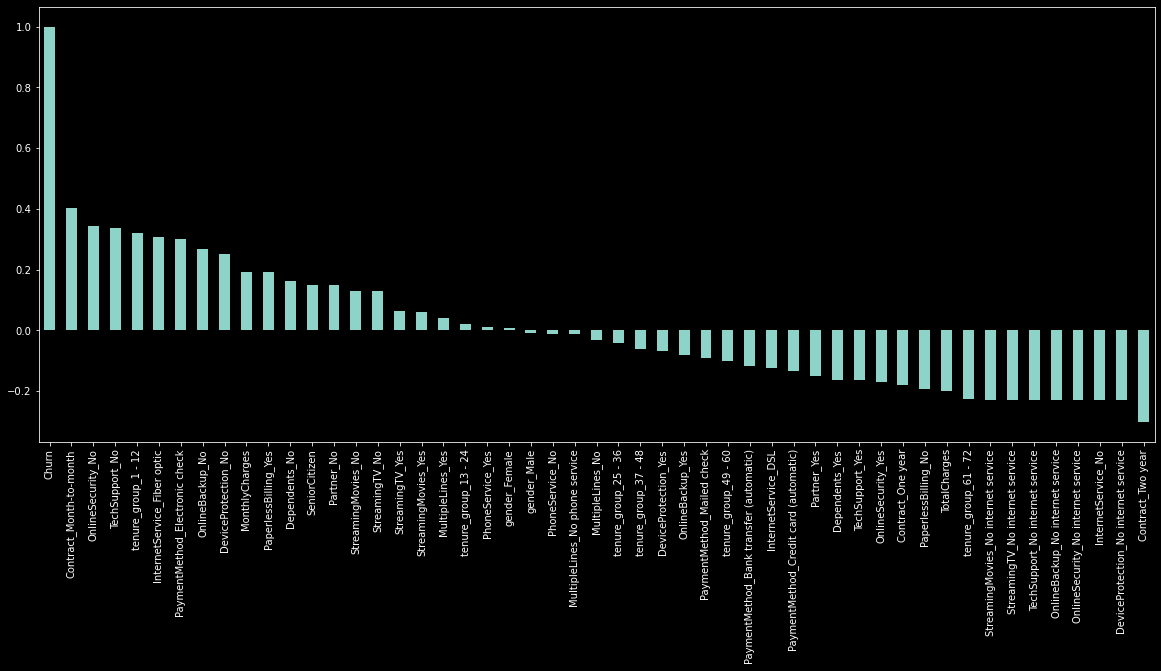

In [57]:
plt.figure(figsize=(20,8))
df_dummy.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

# Observation


1. HIGH Churn seen in case of  Month to month contract, No online security, No Tech support, First year of subscription and Fibre Optics Internet

2. LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

3. Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

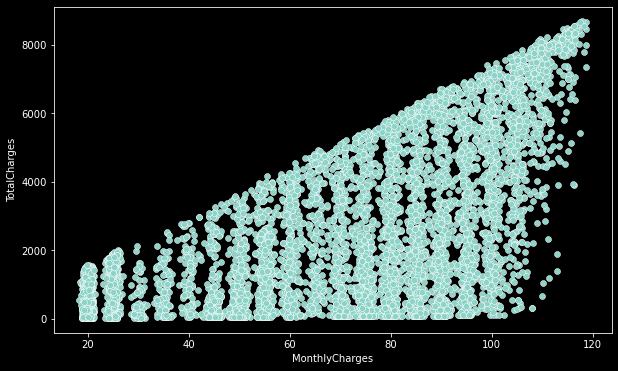

In [58]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df_dummy,  x='MonthlyCharges', y='TotalCharges')

#  Observation
Monthly Charges and Total Charges are increasing linearly.

# Churn by Monthly Charges and Total Charges

Text(0.5, 1.0, 'Monthly charges by churn')

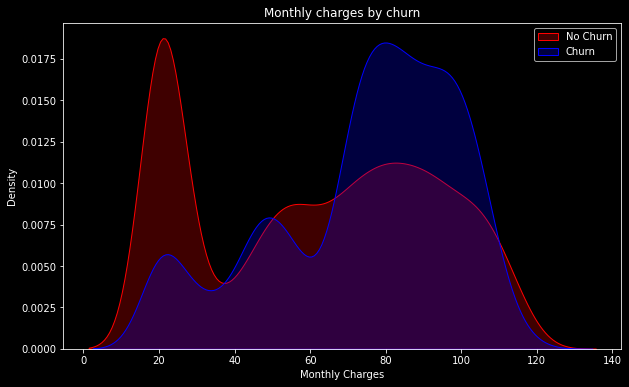

In [59]:
plt.figure(figsize=(10,6))
Mth = sns.kdeplot(df_dummy.MonthlyCharges[(df_dummy["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df_dummy.MonthlyCharges[(df_dummy["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

# Observation 
Churn is high when Monthly Charges ar high

Text(0.5, 1.0, 'Total charges by churn')

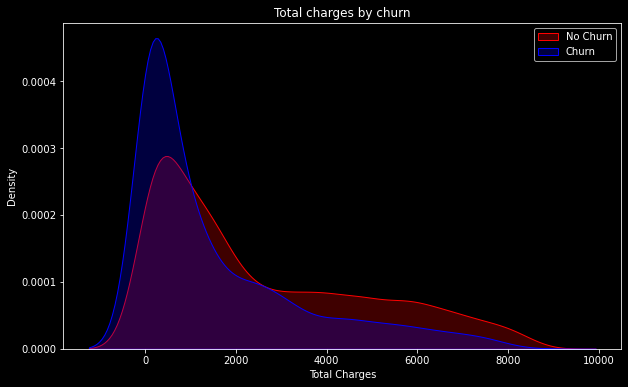

In [60]:
plt.figure(figsize= (10,6))
Tot = sns.kdeplot(df_dummy.TotalCharges[(df_dummy["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(df_dummy.TotalCharges[(df_dummy["Churn"] == 1) ],
                color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

# Observation
1. surprisingly higher Churn at lower Total Charges

# Churn by Tenure

In [61]:
df_x = df.copy()

In [62]:
df_x['Churn'] = np.where(df_x.Churn == 'Yes',1,0)

Text(0.5, 1.0, 'Months by churn')

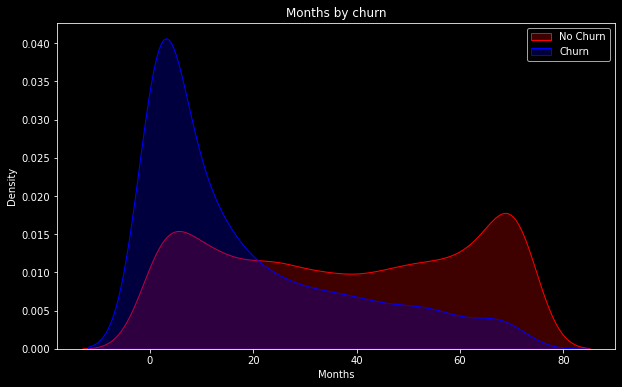

In [63]:
plt.figure(figsize= (10,6))

Tot = sns.kdeplot(df_x.tenure[(df_x["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(df_x.tenure[(df_x["Churn"] == 1) ],
                 color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Months')
Tot.set_title('Months by churn')

# Observation :
Churning is higher when tenure of customer is less 20 months after that stable customers are present.

# Bivariate Analysis

In [64]:
notchurn=df_new.loc[df_new["Churn"]==0]
churn=df_new.loc[df_new["Churn"]==1]

In [65]:
#Count Plot Funtion
def bivariate(df, attribute,Title, hue=None):
    plt.style.use("dark_background")
    plt.figure(figsize=(12,6))
    ax = sns.countplot(x=attribute, data = df , order=df[attribute].value_counts().index,hue= hue , palette=sns.color_palette("magma"))
    plt.title(Title, fontsize = 18)
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])

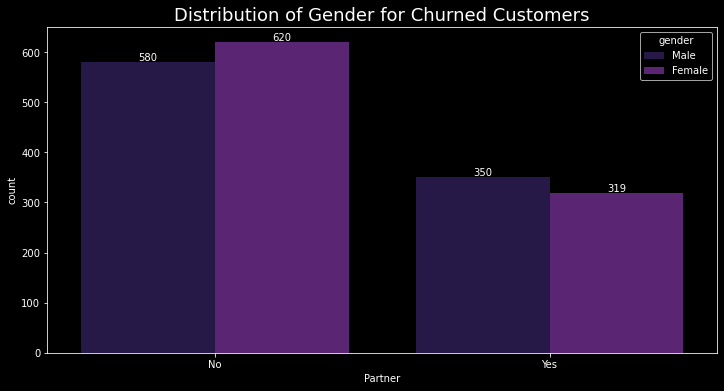

In [66]:
bivariate(churn,attribute='Partner',Title='Distribution of Gender for Churned Customers',hue='gender')

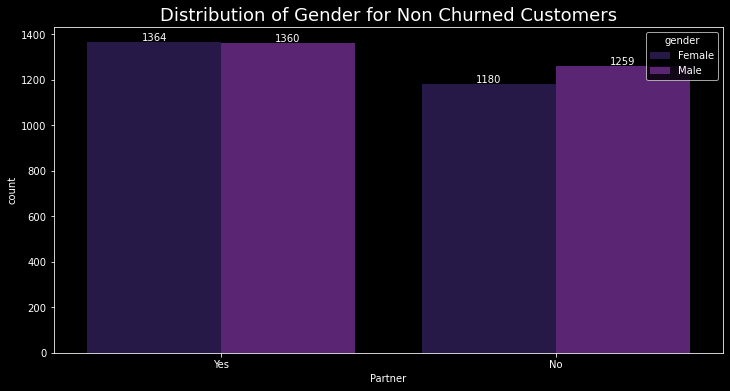

In [67]:
bivariate(notchurn,attribute='Partner',Title='Distribution of Gender for Non Churned Customers',hue='gender')

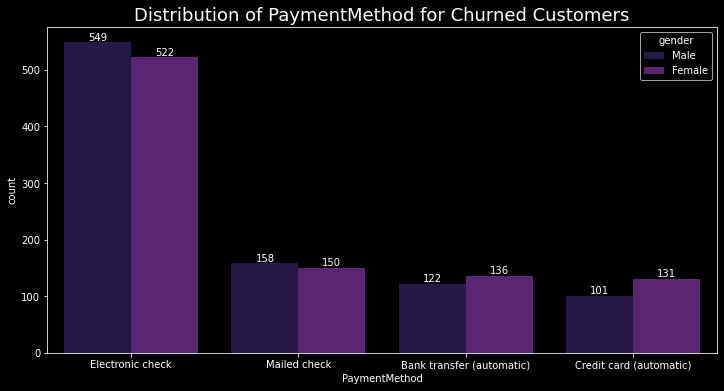

In [68]:
bivariate(churn,attribute='PaymentMethod',Title='Distribution of PaymentMethod for Churned Customers',hue='gender')

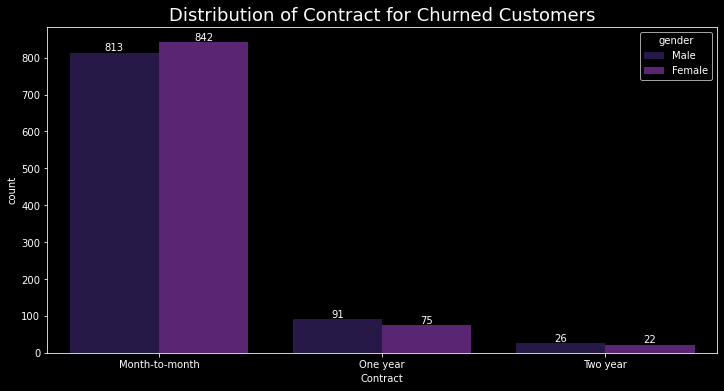

In [69]:
bivariate(churn,attribute='Contract',Title='Distribution of Contract for Churned Customers',hue='gender')

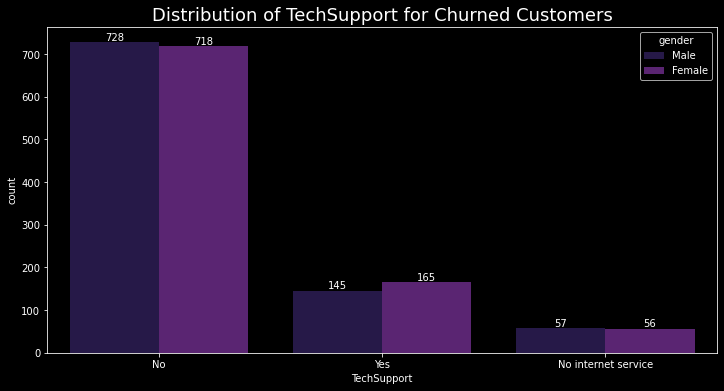

In [70]:
bivariate(churn,attribute='TechSupport',Title='Distribution of TechSupport for Churned Customers',hue='gender')

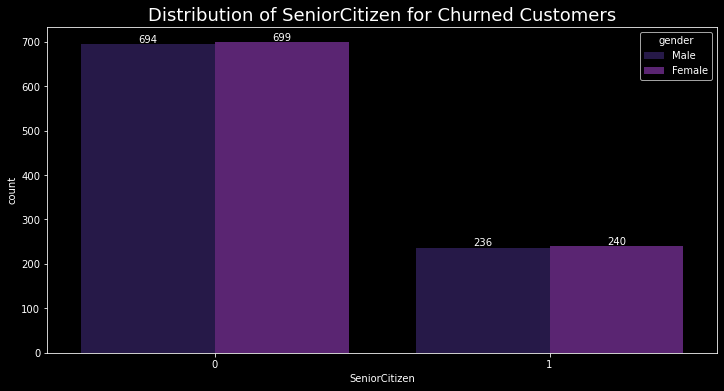

In [71]:
bivariate(churn,attribute='SeniorCitizen',Title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

# Observation
1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners

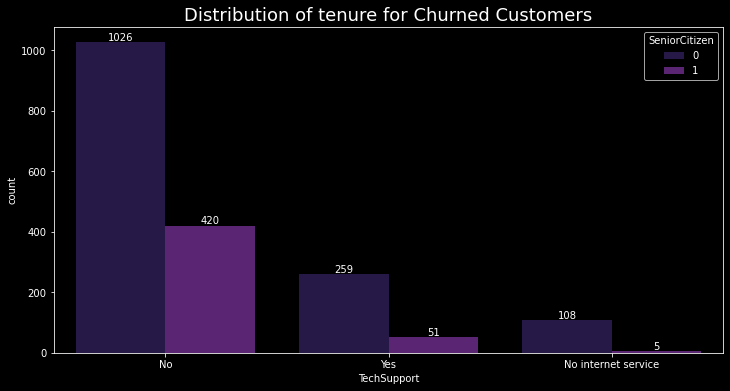

In [81]:
bivariate(churn,attribute='TechSupport',Title='Distribution of tenure for Churned Customers',hue='SeniorCitizen')

# Observation
Non Senior Citizen who donot have Tech support are churning more

In [82]:
churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

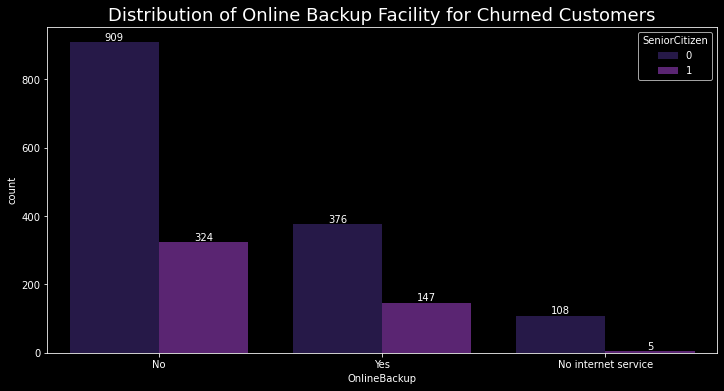

In [86]:
bivariate(churn,attribute='OnlineBackup',Title='Distribution of Online Backup Facility for Churned Customers',hue='SeniorCitizen')

# Observation
Customers who dont have Online Backup facility are churning more and specifically Non Senior Citizens are the major Churner for the particular category.